<a href="https://colab.research.google.com/github/shivangis-24/AI-for-medical-diagnosis/blob/main/localize_text_tesseract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

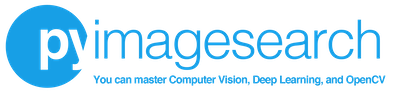

# Tesseract OCR: Text localization and detection
### by [PyImageSearch.com](http://www.pyimagesearch.com)

## Welcome to **[PyImageSearch Plus](http://pyimg.co/plus)** Jupyter Notebooks!

This notebook is associated with the [Tesseract OCR: Text localization and detection](https://www.pyimagesearch.com/2020/05/25/tesseract-ocr-text-localization-and-detection/) blog post published on 2020-05-25.

Only the code for the blog post is here. Most codeblocks have a 1:1 relationship with what you find in the blog post with two exceptions: (1) Python classes are not separate files as they are typically organized with PyImageSearch projects, and (2) Command Line Argument parsing is replaced with an `args` dictionary that you can manipulate as needed.

We recommend that you execute (press ▶️) the code block-by-block, as-is, before adjusting parameters and `args` inputs. Once you've verified that the code is working, you are welcome to hack with it and learn from manipulating inputs, settings, and parameters. For more information on using Jupyter and Colab, please refer to these resources:

*   [Jupyter Notebook User Interface](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html#notebook-user-interface)
*   [Overview of Google Colaboratory Features](https://colab.research.google.com/notebooks/basic_features_overview.ipynb)

As a reminder, these PyImageSearch Plus Jupyter Notebooks are not for sharing; please refer to the **Copyright** directly below and **Code License Agreement** in the last cell of this notebook. 

Happy hacking!

*Adrian*

<hr>

***Copyright:*** *The contents of this Jupyter Notebook, unless otherwise indicated, are Copyright 2020 Adrian Rosebrock, PyimageSearch.com. All rights reserved. Content like this is made possible by the time invested by the authors. If you received this Jupyter Notebook and did not purchase it, please consider making future content possible by joining PyImageSearch Plus at http://pyimg.co/plus/ today.*

### Install the necessary packages

In [1]:
!sudo apt-get install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 39 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (3,692 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

### Download the code zip file

In [2]:
!wget https://s3-us-west-2.amazonaws.com/static.pyimagesearch.com/tesseract-text-localization/localize-text-tesseract.zip
!unzip -qq localize-text-tesseract.zip
%cd localize-text-tesseract

--2021-06-26 11:52:58--  https://s3-us-west-2.amazonaws.com/static.pyimagesearch.com/tesseract-text-localization/localize-text-tesseract.zip
Resolving s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)... 52.218.181.64
Connecting to s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)|52.218.181.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19679 (19K) [application/zip]
Saving to: ‘localize-text-tesseract.zip’

localize-text-tesse 100%[===================>]  19.22K  --.-KB/s    in 0.06s   

2021-06-26 11:52:58 (332 KB/s) - ‘localize-text-tesseract.zip’ saved [19679/19679]

/content/localize-text-tesseract


## Blog Post Code

### Import Packages

In [3]:
# import the necessary packages
from matplotlib import pyplot as plt
from pytesseract import Output
import pytesseract
import cv2

### Function to display images in Jupyter Notebooks and Google Colab

In [4]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

### Implementing text localization, text detection, and OCR with Tesseract

In [5]:
# construct the argument parser and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-i", "--image", required=True,
#	help="path to input image to be OCR'd")
#ap.add_argument("-c", "--min-conf", type=int, default=0,
#	help="mininum confidence value to filter weak text detection")
#args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"image": "apple_support.png",
	"min_conf": 0
}

In [8]:
pip install pdf2image

In [10]:
!apt-get install poppler-utils 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.12 [154 kB]
Fetched 154 kB in 1s (238 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 160819 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.62.0-2ubuntu2.12_amd64.deb ...
Unpacking poppler-utils (0.62.0-2ubuntu2.12) ...
Setting up poppler-utils (0.62.0-2ubuntu2.12) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [17]:
# import module
from pdf2image import convert_from_path


# Store Pdf with convert_from_path function
images = convert_from_path('/content/RESUME.docx.pdf')

for i in range(len(images)):

	# Save pages as images in the pdf
	images[i].save('page'+ str(i) +'.jpg', 'JPEG')



In [20]:
# load the input image, convert it from BGR to RGB channel ordering,
# and use Tesseract to localize each area of text in the input image
image = cv2.imread('/content/localize-text-tesseract/page0.jpg')
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
results = pytesseract.image_to_data(rgb, output_type=Output.DICT)

Confidence: 91
Text: Shivangi

Confidence: 96
Text: Sharma

Confidence: 92
Text: shivangi96.ss@gmail.com

Confidence: 92
Text: |

Confidence: 84
Text: www.linkedin.com/in/shivangi-sharma01

Confidence: 96
Text: |

Confidence: 93
Text: GitHub

Confidence: 93
Text: -

Confidence: 86
Text: shivangis-24|

Confidence: 91
Text: +919829871995

Confidence: 95
Text:  

Confidence: 80
Text: EDUCATION

Confidence: 96
Text: Birla

Confidence: 96
Text: Institute

Confidence: 96
Text: of

Confidence: 95
Text: Technology

Confidence: 96
Text: and

Confidence: 96
Text: Science,

Confidence: 88
Text: Pilani

Confidence: 44
Text: -

Confidence: 96
Text: Dubai

Confidence: 96
Text: Campus,

Confidence: 96
Text: 2015-2019

Confidence: 96
Text: Bachelor

Confidence: 96
Text: of

Confidence: 93
Text: Engineering

Confidence: 92
Text: (Hons.)

Confidence: 96
Text: in

Confidence: 96
Text: Computer

Confidence: 96
Text: Science

Confidence: 96
Text: Engineering

Confidence: 96
Text: |

Confidence: 93
Text: GP

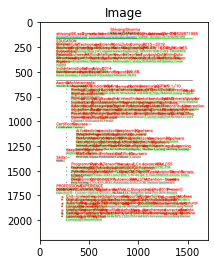

ValueError: ignored

<Figure size 432x288 with 0 Axes>

In [22]:
# loop over each of the individual text localizations
for i in range(0, len(results["text"])):
	# extract the bounding box coordinates of the text region from
	# the current result
	x = results["left"][i]
	y = results["top"][i]
	w = results["width"][i]
	h = results["height"][i]

	# extract the OCR text itself along with the confidence of the
	# text localization
	text = results["text"][i]
	conf = int(results["conf"][i])

    # filter out weak confidence text localizations
	if conf > args["min_conf"]:
		# display the confidence and text to our terminal
		print("Confidence: {}".format(conf))
		print("Text: {}".format(text))
		print("")
  
		# strip out non-ASCII text so we can draw the text on the image
		# using OpenCV, then draw a bounding box around the text along
		# with the text itself
		text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
		cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
		cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
			1.2, (0, 0, 255), 3)
  
# show the output image
plt_imshow("Image", image)
plt.savefig()

For a detailed walkthrough of the concepts and code, be sure to refer to the full tutorial, [*Tesseract OCR: Text localization and detection*](https://www.pyimagesearch.com/2020/05/25/tesseract-ocr-text-localization-and-detection/) published on 2020-05-25.

# Code License Agreement
```
Copyright (c) 2020 PyImageSearch.com

SIMPLE VERSION
Feel free to use this code for your own projects, whether they are
purely educational, for fun, or for profit. THE EXCEPTION BEING if
you are developing a course, book, or other educational product.
Under *NO CIRCUMSTANCE* may you use this code for your own paid
educational or self-promotional ventures without written consent
from Adrian Rosebrock and PyImageSearch.com.

LONGER, FORMAL VERSION
Permission is hereby granted, free of charge, to any person obtaining
a copy of this software and associated documentation files
(the "Software"), to deal in the Software without restriction,
including without limitation the rights to use, copy, modify, merge,
publish, distribute, sublicense, and/or sell copies of the Software,
and to permit persons to whom the Software is furnished to do so,
subject to the following conditions:
The above copyright notice and this permission notice shall be
included in all copies or substantial portions of the Software.
Notwithstanding the foregoing, you may not use, copy, modify, merge,
publish, distribute, sublicense, create a derivative work, and/or
sell copies of the Software in any work that is designed, intended,
or marketed for pedagogical or instructional purposes related to
programming, coding, application development, or information
technology. Permission for such use, copying, modification, and
merger, publication, distribution, sub-licensing, creation of
derivative works, or sale is expressly withheld.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND,
EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES
OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND
NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS
BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN
ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN
CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
```